
<p style = 'font-size:20px;color:purple'><b><u> Problem Statement : Predict the percentage of an student based on the no. of study hours </u></b></p>
<p style = 'font-size:18px;color:black'> Machine Learning Algorithm used : Linear Regression </p>
<p ><b>Author:</b> Tamanna </p>


 

In [45]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#Reading data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


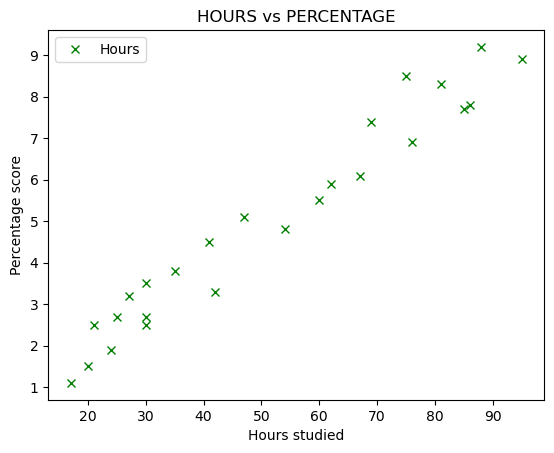

In [47]:
#plot the distribution of scores
data.plot(x="Scores",y="Hours",style='x',color="green")
plt.title("HOURS vs PERCENTAGE")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

### From the plot we can say that there is a positive linear relation between number of hours studied and percentage of scores

In [48]:
#Preparing the data----  divide the data into "attributes" (inputs) and "labels" (outputs)
x=data.iloc[:, :-1].values
y=data.iloc[:,1].values

In [49]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [50]:
#Split the data into training and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
#Train our algorithm
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

print("Training complete")

Training complete


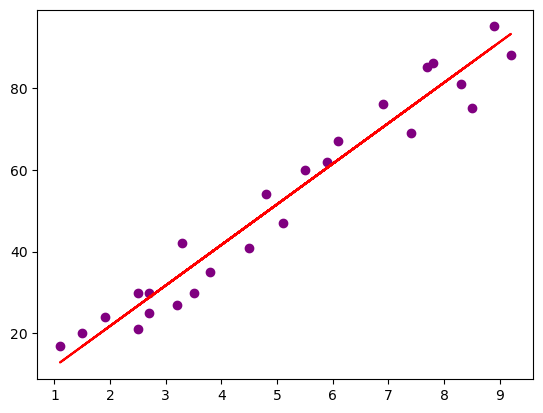

In [52]:
# Plotting the regression line
line=regression.coef_*x+regression.intercept_
plt.scatter(x,y,color="purple")   # Plotting for the test data
plt.plot(x,line,color="red")
plt.show()

In [53]:
#Predicting the scores
y_pred=regression.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [54]:
#Comparing actual vs predicted
df=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/day?

In [55]:
import numpy as np

scalar_value = 9.25
array = np.array([scalar_value])
reshaped_array = array.reshape(-1, 1)

own_pred = regression.predict(reshaped_array)
own_pred


array([93.69173249])

In [56]:
#Evaluate the performance of algorithm
from sklearn import metrics
print("mean absolute error :",metrics.mean_absolute_error(y_test,y_pred))

mean absolute error : 4.183859899002975


In [57]:
from sklearn.metrics import r2_score
rscore=r2_score(y_test,y_pred)
rscore

0.9454906892105356